In [ ]:
import pandas as pd
import numpy as np
data = {'Maturity': [0.5, 1.0, 1.5, 2.0, 2.5], 'CouponRate': [0.0, 0.04, 0.06, 0.075, 0.07],  'Price': [98.0, 101.5, 103.0, 104.0, 106.5] }
bonds_df = pd.DataFrame(data)
zero_rates = []

for i in range(len(bonds_df)):
    maturity = bonds_df.loc[i, 'Maturity']
    coupon_rate = bonds_df.loc[i, 'CouponRate']
    price = bonds_df.loc[i, 'Price']
    coupon = coupon_rate * 100 / 2
    if coupon_rate == 0:
        rate = (100 / price - 1) * (2 / maturity)
        zero_rates.append(rate)

    else:
       pv_coupons = 0
       for j in range(i):
            prev_maturity = bonds_df.loc[j, 'Maturity']
            prev_rate = zero_rates[j]
            pv_coupons += coupon / ((1 + prev_rate/2) ** (prev_maturity*2))
       rate = (( (price - pv_coupons) / (100 + coupon) ) ** (-1 / (maturity*2))) - 1
       zero_rates.append(rate*2)

bonds_df['ZeroRate'] = [round(r*100, 4) for r in zero_rates]
print("Bootstrapped Zero-Coupon Rates (%):")
print(bonds_df)

Bootstrapped Zero-Coupon Rates (%):
   Maturity  CouponRate  Price  ZeroRate
0       0.5       0.000   98.0    8.1633
1       1.0       0.040  101.5    2.4172
2       1.5       0.060  103.0    3.9092
3       2.0       0.075  104.0    5.4356
4       2.5       0.070  106.5    4.2049


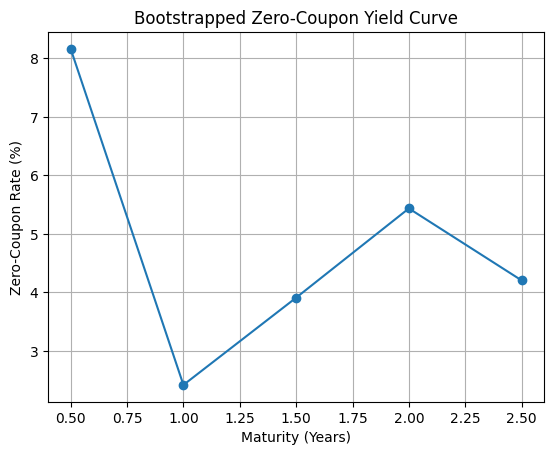

In [ ]:
import matplotlib.pyplot as plt

plt.plot(bonds_df['Maturity'], bonds_df['ZeroRate'], marker='o')
plt.title("Bootstrapped Zero-Coupon Yield Curve")
plt.xlabel("Maturity (Years)")
plt.ylabel("Zero-Coupon Rate (%)")
plt.grid(True)
plt.show()